# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-warning">
    
# <span style=" color:red">Store Sharing Project!

Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>

<div class="alert alert-block alert-info alert">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration

- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [ ]:
# KÜTÜPHANELER
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource, CategoricalColorMapper
from bokeh.transform import cumsum

In [1]:
file_path = 'store_sharing.csv'

df = pd.read_csv(file_path)

print(df.head())


             timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 

- Handle missing values.

- Check for duplicates and remove them if found.

- Standardize column names (if necessary) for consistent naming conventions.

- Validate data types and convert columns to appropriate types if needed.

- Look at the data type of each variable, transform timestamp in type, and set it as index.

- Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

In [83]:
print(df.isnull().sum())

level_0         0
index           0
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
day_of_week     0
day_of_month    0
hour            0
month           0
year            0
year_month      0
dtype: int64


In [84]:
duplicates = df[df.duplicated()]
print(f"Duplicate rows: {len(duplicates)}")


Duplicate rows: 0


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [6]:
print(df.dtypes)

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['is_holiday'] = df['is_holiday'].astype('bool')
df['is_weekend'] = df['is_weekend'].astype('bool')


timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


In [7]:
df.set_index('timestamp', inplace=True)


In [9]:
df['day_of_week'] = df.index.dayofweek  
df['day_of_month'] = df.index.day  
df['hour'] = df.index.hour  
df['month'] = df.index.month 
df['year'] = df.index.year  
df['season'] = df['season'].map({0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}) 


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal

<div class="alert alert-block alert-success">

### <span style=" color:red"> Look at the data type of each variable, transform timestamp in type, and set it as index.

In [20]:
print("Data types before transformation:")
print(df.dtypes)

df['timestamp'] = pd.to_datetime(df['timestamp'])

print("\nData types after transformation:")
print(df.dtypes)

df.set_index('timestamp', inplace=True)

print("\nFirst few rows of the data with timestamp as index:")
print(df.head())


Data types before transformation:
timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday                bool
is_weekend                bool
season                  object
day_of_week              int32
day_of_month             int32
hour                     int32
month                    int32
year                     int32
dtype: object

Data types after transformation:
timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday                bool
is_weekend                bool
season                  object
day_of_week              int32
day_of_month             int32
hour                     int32
month                    int32
year               

<div class="alert alert-block alert-success">

### <span style=" color:red"> Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

In [28]:
df.reset_index(drop=True, inplace=True)

df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day_of_month'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)

print(df.head())


   level_0  index           timestamp  cnt   t1   t2    hum  wind_speed  \
0        0      0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0   
1        1      1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0   
2        2      2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0   
3        3      3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0   
4        4      4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5   

   weather_code  is_holiday  is_weekend  season  day_of_week  day_of_month  \
0           3.0       False        True  Winter            6             4   
1           1.0       False        True  Winter            6             4   
2           1.0       False        True  Winter            6             4   
3           1.0       False        True  Winter            6             4   
4           1.0       False        True  Winter            6             4   

   hour  month  year  
0     0      1  2015  
1     1      1  2015  
2     2    

<div class="alert alert-block alert-success">

### <span style=" color:red"> Visualize the correlation with a heatmap

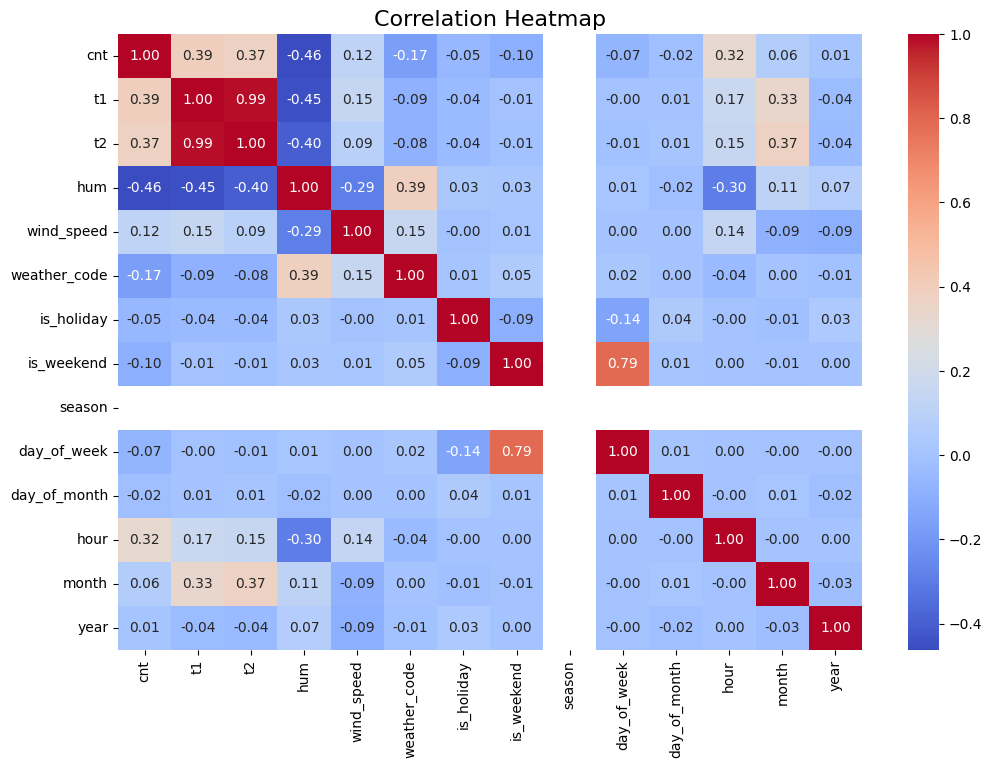

In [31]:
df['season'] = df['season'].map({'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3})
df['weather_code'] = df['weather_code'].astype('category').cat.codes 
df['is_holiday'] = df['is_holiday'].astype(int)  
df['is_weekend'] = df['is_weekend'].astype(int) 
df['day_of_week'] = df['day_of_week'].astype(int)  

numerical_cols = ['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season', 'day_of_week', 'day_of_month', 'hour', 'month', 'year']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Visualize the correlation of the target variable and the other features with barplot

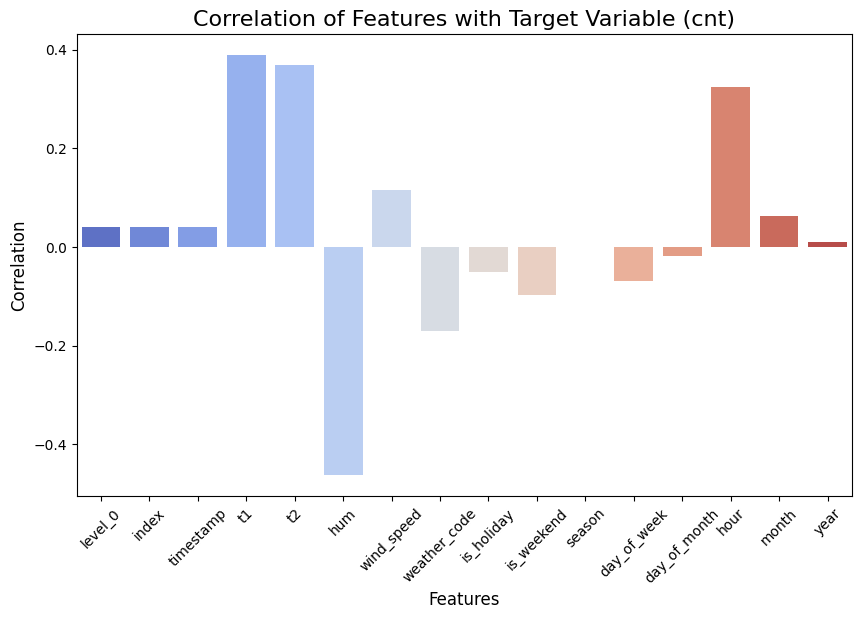

In [33]:
correlations = df.corr()['cnt'].drop('cnt')  

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')

plt.title('Correlation of Features with Target Variable (cnt)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)  
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares over time use lineplot.

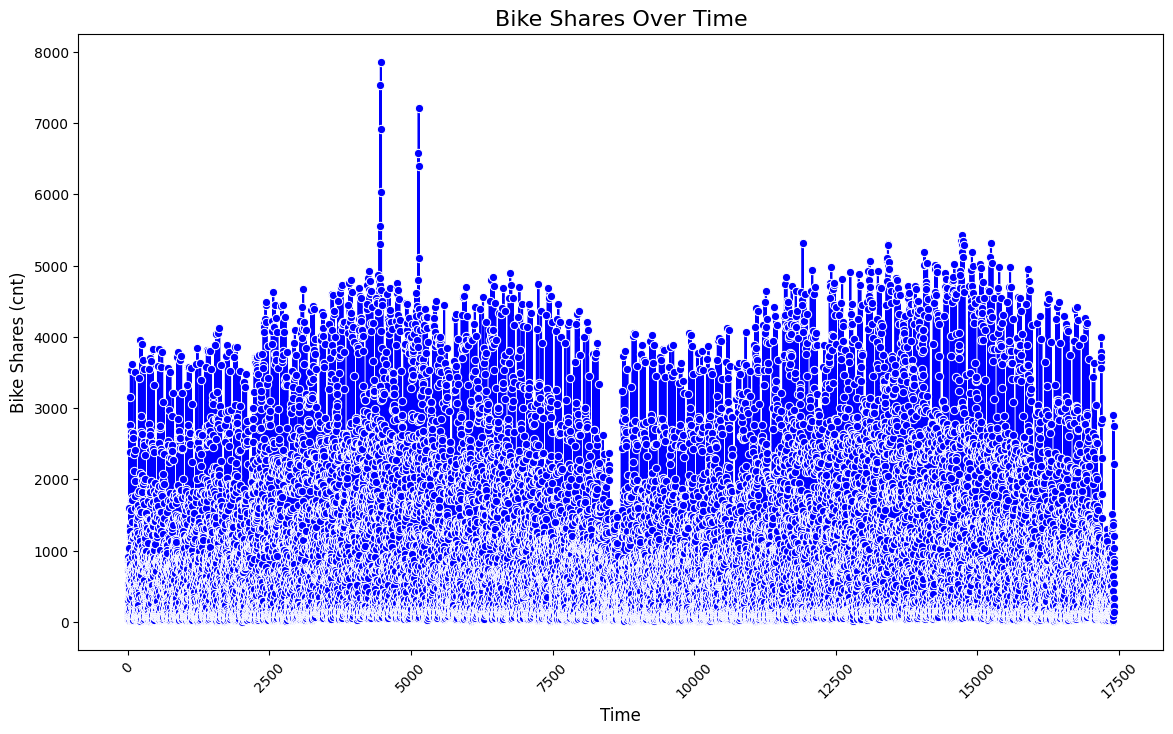

In [35]:
plt.figure(figsize=(14, 8))
sns.lineplot(x=df.index, y=df['cnt'], marker='o', color='b')

plt.title('Bike Shares Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Bike Shares (cnt)', fontsize=12)
plt.xticks(rotation=45) 
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

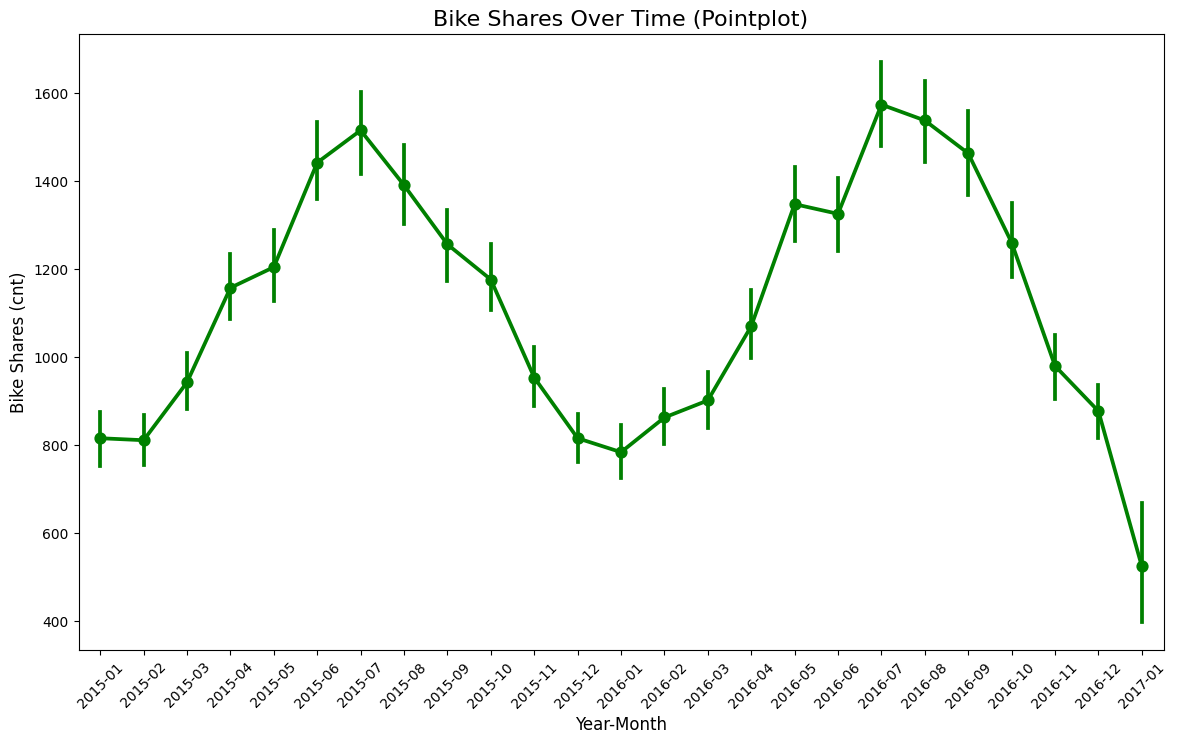

In [38]:
plt.figure(figsize=(14, 8))
sns.pointplot(x='year_month', y='cnt', data=df, color='g')
plt.title('Bike Shares Over Time (Pointplot)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Bike Shares (cnt)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by hours on (holidays, weekend, season).
</span>

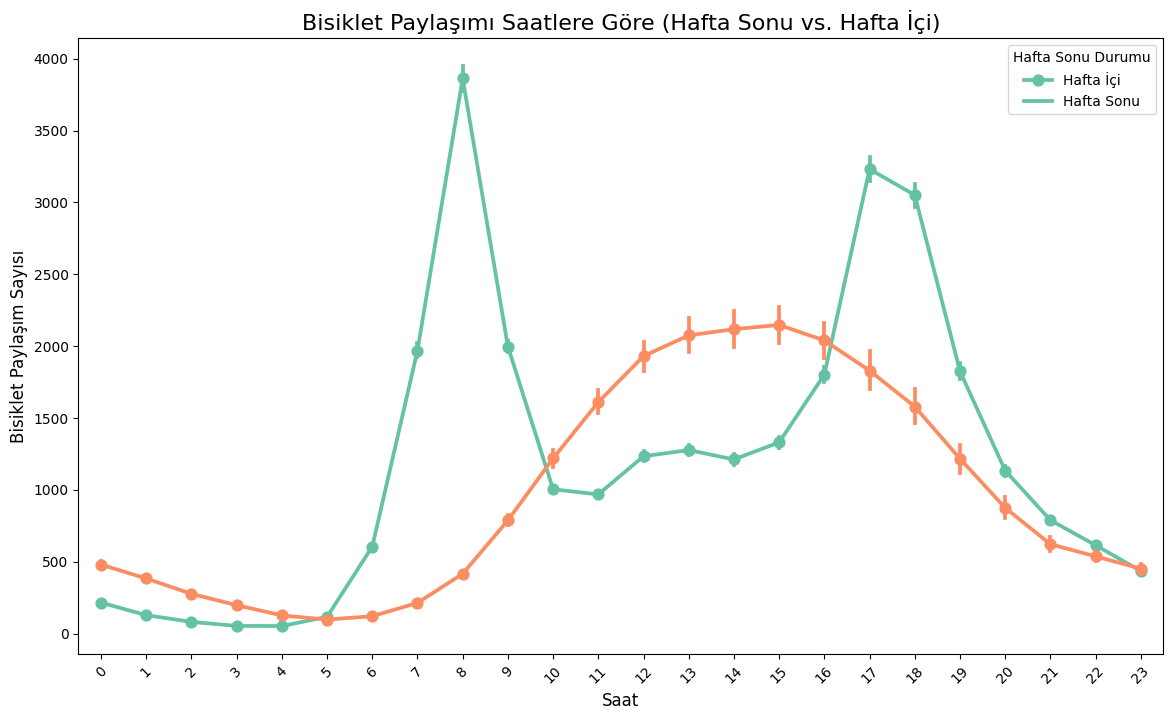

In [40]:
plt.figure(figsize=(14, 8))
sns.pointplot(x='hour', y='cnt', hue='is_weekend', data=df, palette='Set2')
plt.title('Bisiklet Paylaşımı Saatlere Göre (Hafta Sonu vs. Hafta İçi)', fontsize=16)
plt.xlabel('Saat', fontsize=12)
plt.ylabel('Bisiklet Paylaşım Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hafta Sonu Durumu', labels=['Hafta İçi', 'Hafta Sonu'])
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

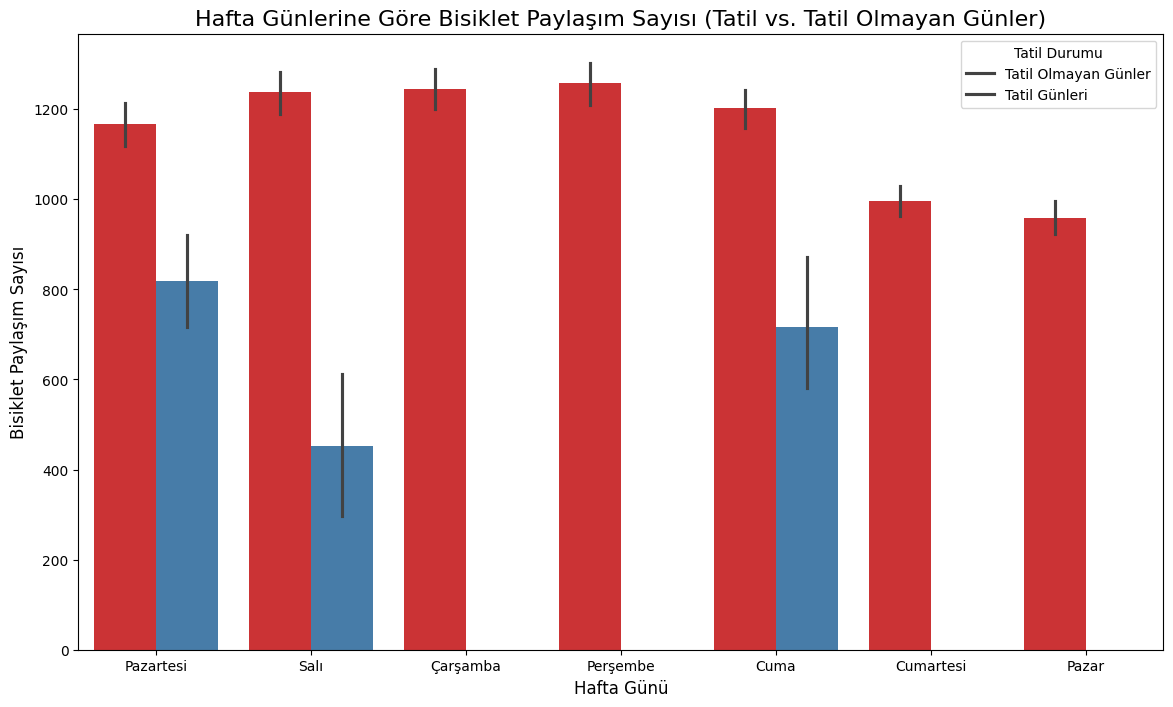

In [41]:
plt.figure(figsize=(14, 8))
sns.barplot(x='day_of_week', y='cnt', hue='is_holiday', data=df, palette='Set1')
plt.title('Hafta Günlerine Göre Bisiklet Paylaşım Sayısı (Tatil vs. Tatil Olmayan Günler)', fontsize=16)
plt.xlabel('Hafta Günü', fontsize=12)
plt.ylabel('Bisiklet Paylaşım Sayısı', fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar'])
plt.legend(title='Tatil Durumu', labels=['Tatil Olmayan Günler', 'Tatil Günleri'])
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by day of month

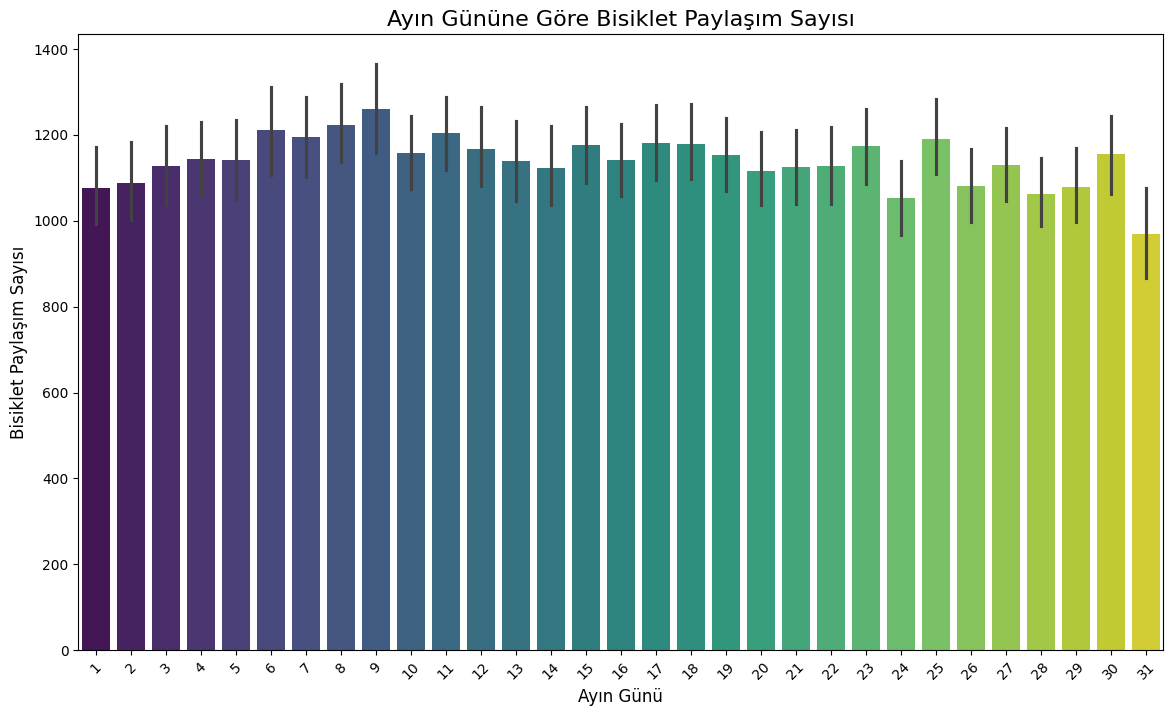

In [42]:
plt.figure(figsize=(14, 8))
sns.barplot(x='day_of_month', y='cnt', data=df, palette='viridis')
plt.title('Ayın Gününe Göre Bisiklet Paylaşım Sayısı', fontsize=16)
plt.xlabel('Ayın Günü', fontsize=12)
plt.ylabel('Bisiklet Paylaşım Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by year

- Plot bike shares on holidays by seasons

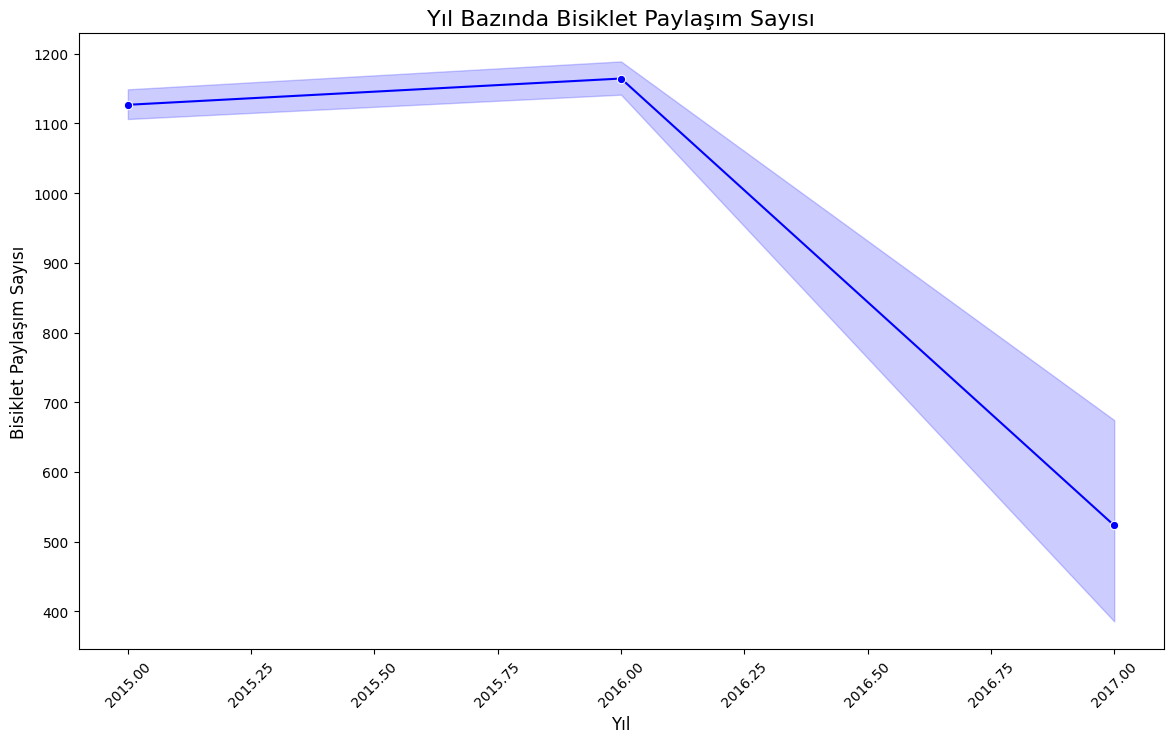

In [43]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='cnt', data=df, marker='o', color='b')
plt.title('Yıl Bazında Bisiklet Paylaşım Sayısı', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Bisiklet Paylaşım Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

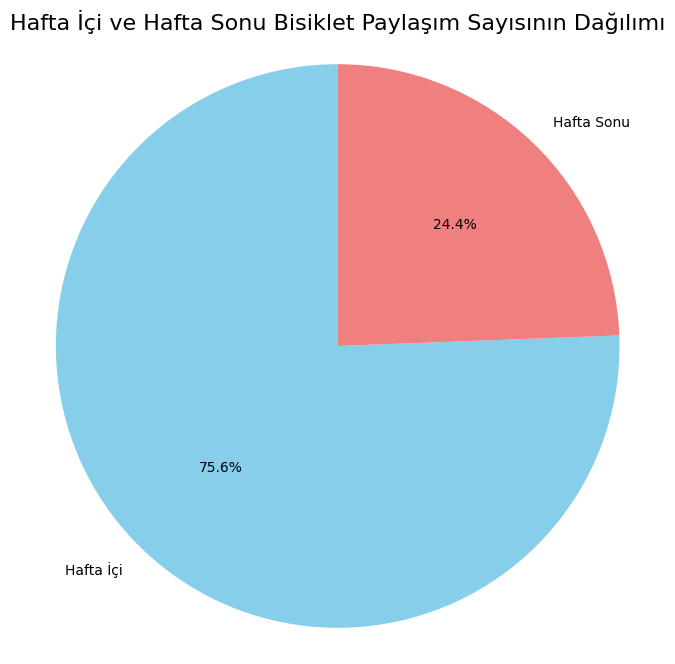

In [47]:
weekend_data = df.groupby('is_weekend')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(weekend_data['cnt'], labels=['Hafta İçi', 'Hafta Sonu'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Hafta İçi ve Hafta Sonu Bisiklet Paylaşım Sayısının Dağılımı', fontsize=16)
plt.axis('equal')  
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot the distribution of weather code by seasons

In [71]:
df_cleaned = df.dropna(subset=['season'])  

season_weather_counts = df_cleaned.groupby(['season', 'weather_code']).size().reset_index(name='count')

print(season_weather_counts.head())


   season  weather_code  count
0    -1.0             0   6150
1    -1.0             1   4034
2    -1.0             2   3551
3    -1.0             3   1464
4    -1.0             4   2141


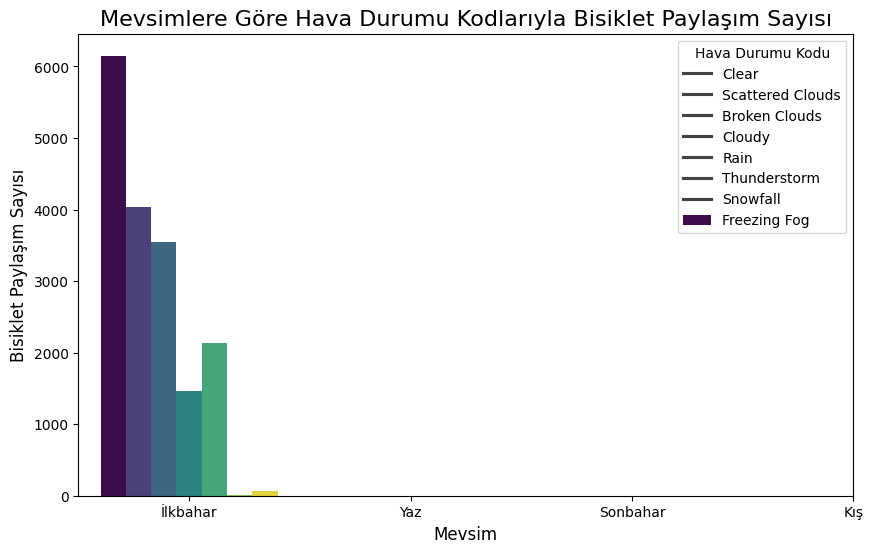

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', hue='weather_code', data=season_weather_counts, palette='viridis')

plt.title('Mevsimlere Göre Hava Durumu Kodlarıyla Bisiklet Paylaşım Sayısı', fontsize=16)
plt.xlabel('Mevsim', fontsize=12)
plt.ylabel('Bisiklet Paylaşım Sayısı', fontsize=12)
plt.xticks([0, 1, 2, 3], ['İlkbahar', 'Yaz', 'Sonbahar', 'Kış'])
plt.legend(title='Hava Durumu Kodu', labels=['Clear', 'Scattered Clouds', 'Broken Clouds', 'Cloudy', 'Rain', 'Thunderstorm', 'Snowfall', 'Freezing Fog'])
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.

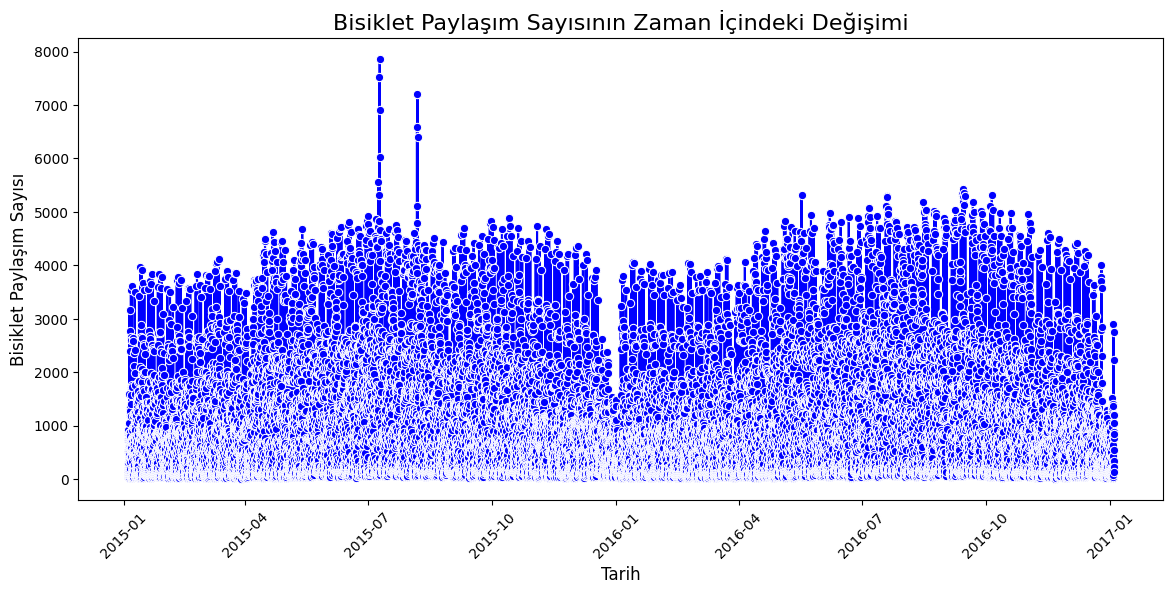

In [72]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='timestamp', y='cnt', data=df, marker='o', color='b')
plt.title('Bisiklet Paylaşım Sayısının Zaman İçindeki Değişimi', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Bisiklet Paylaşım Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.show()


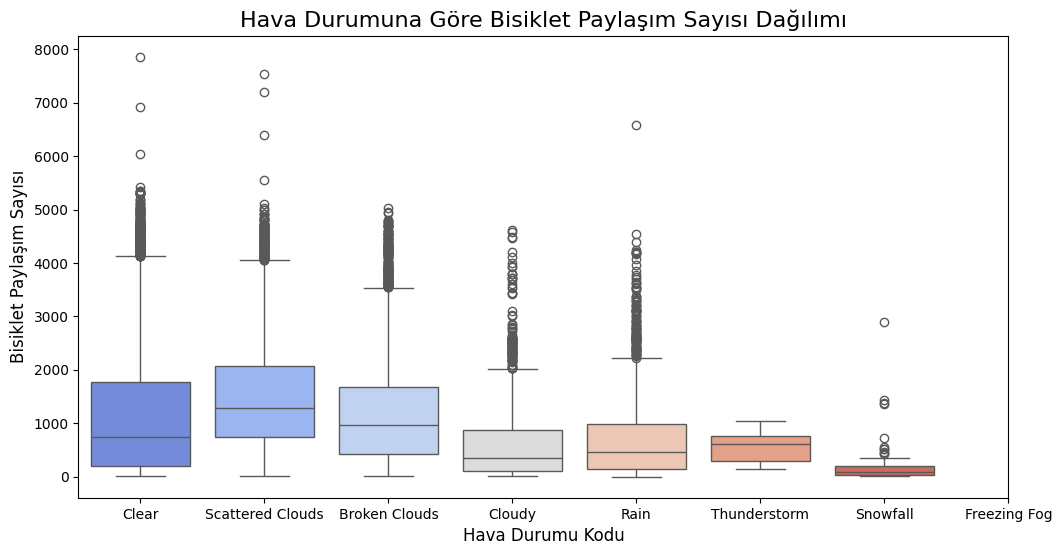

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_code', y='cnt', data=df, palette='coolwarm')
plt.title('Hava Durumuna Göre Bisiklet Paylaşım Sayısı Dağılımı', fontsize=16)
plt.xlabel('Hava Durumu Kodu', fontsize=12)
plt.ylabel('Bisiklet Paylaşım Sayısı', fontsize=12)
plt.xticks(ticks=range(8), labels=['Clear', 'Scattered Clouds', 'Broken Clouds', 'Cloudy', 'Rain', 'Thunderstorm', 'Snowfall', 'Freezing Fog'])
plt.show()


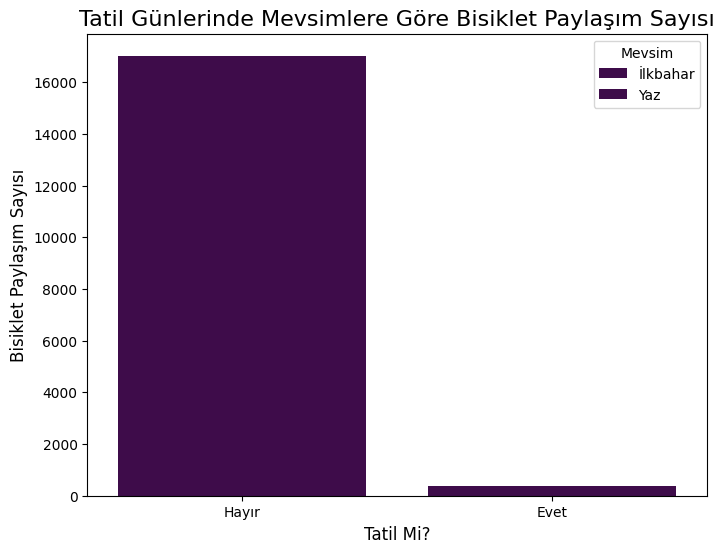

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_holiday', data=df, hue='season', palette='viridis')
plt.title('Tatil Günlerinde Mevsimlere Göre Bisiklet Paylaşım Sayısı', fontsize=16)
plt.xlabel('Tatil Mi?', fontsize=12)
plt.ylabel('Bisiklet Paylaşım Sayısı', fontsize=12)
plt.xticks([0, 1], ['Hayır', 'Evet'])
plt.legend(title='Mevsim', labels=['İlkbahar', 'Yaz', 'Sonbahar', 'Kış'])
plt.show()


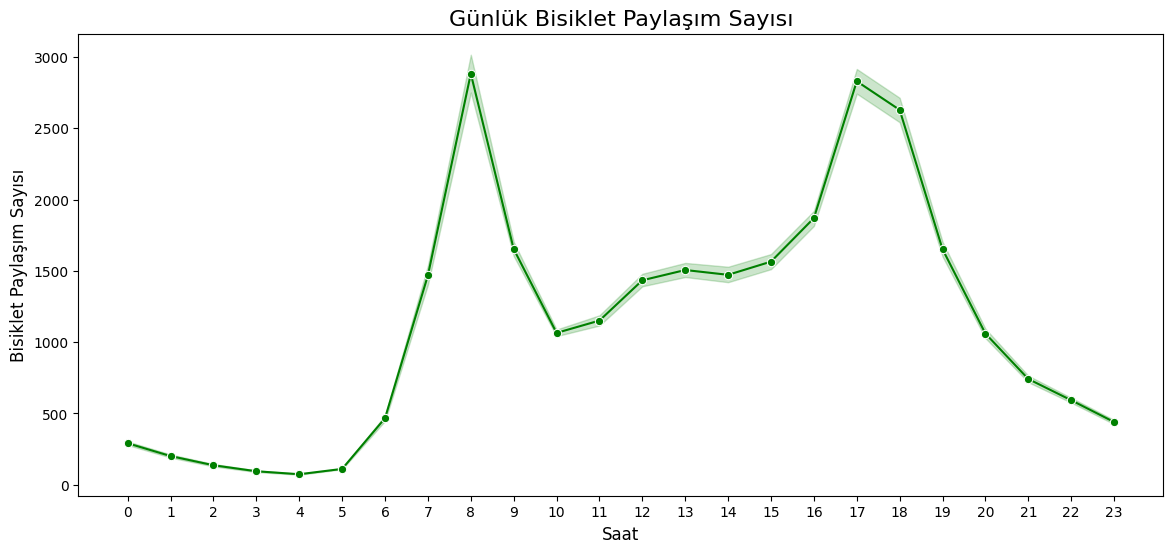

In [76]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='hour', y='cnt', data=df, marker='o', color='g')
plt.title('Günlük Bisiklet Paylaşım Sayısı', fontsize=16)
plt.xlabel('Saat', fontsize=12)
plt.ylabel('Bisiklet Paylaşım Sayısı', fontsize=12)
plt.xticks(range(0, 24))
plt.show()


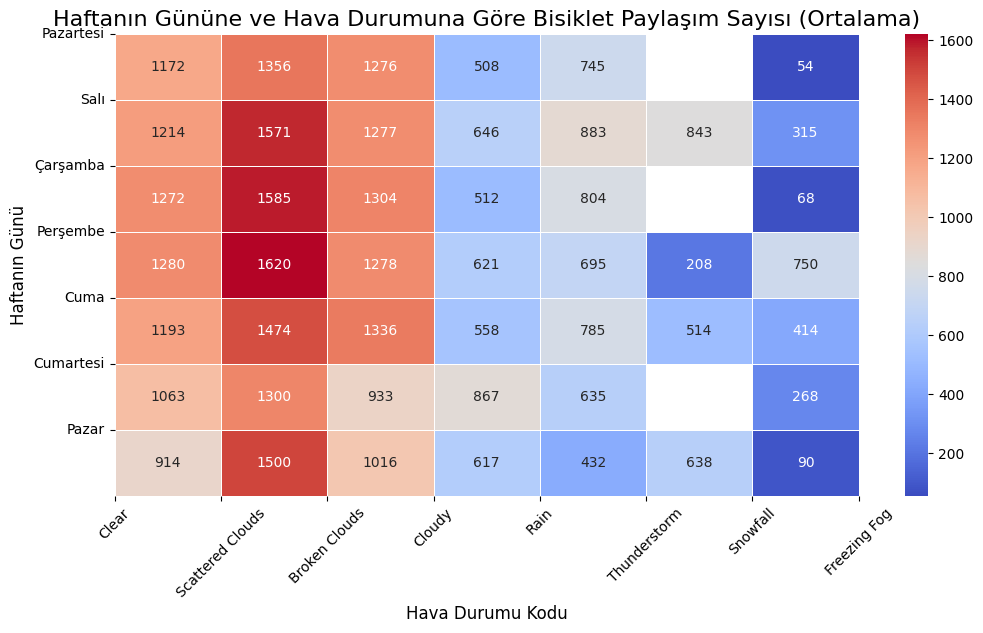

In [81]:
pivot_df = df.pivot_table(index='day_of_week', columns='weather_code', values='cnt', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.0f', linewidths=0.5)
plt.title('Haftanın Gününe ve Hava Durumuna Göre Bisiklet Paylaşım Sayısı (Ortalama)', fontsize=16)
plt.xlabel('Hava Durumu Kodu', fontsize=12)
plt.ylabel('Haftanın Günü', fontsize=12)
plt.xticks(ticks=range(8), labels=['Clear', 'Scattered Clouds', 'Broken Clouds', 'Cloudy', 'Rain', 
                                   'Thunderstorm', 'Snowfall', 'Freezing Fog'], rotation=45)
plt.yticks(ticks=range(7), labels=['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar'], rotation=0)
plt.show()


<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions

In [ ]:
# Haftanın Günlerine Göre Bisiklet Paylaşım Sayıları
# Hava Durumu Kategorilerinin Bisiklet Paylaşımı Üzerindeki Etkisi
# Mevsimsel Etkiler
# Öneriler : 
# --- Bisiklet Paylaşım Ağı Geliştirme
# --- Hafta Sonu Yönlendirmeleri
# --- Hava Durumu Tahminleriyle Entegre Sistemler

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |